In [1]:
import pandas as pd
import metaknowledge as mk

In [2]:
RC = mk.RecordCollection('data')

In [3]:
selectedTags = ['PY', 'DE']
RC.writeCSV('topKeywords.csv',onlyTheseTags=selectedTags)

In [4]:
import os

In [5]:
#读取topKeywords.csv，保存到新建的topKeywords.txt中
data = pd.read_csv('topKeywords.csv', encoding='utf-8')
with open('topKeywords.txt','a+', encoding='utf-8') as f:
    for line in data.values:
        #str(line[0])：csv中第0列；'\n'：读取csv每行后在txt中换行
        f.write((str(line[1])+'\n'))

In [6]:
def getText():
    txt = open("topKeywords.txt", "r").read()   #读取Hamlet文本文件，并返回给txt
    txt = txt.lower()          #将文件中的单词全部变为小写
    for ch in '!"#$%&()*+,-./:;<=>?@[\\]^_‘{|}~': 
        txt = txt.replace(ch, " ")   #将文本中特殊字符替换为空格
    return txt
 
hamletTxt = getText()
words  = hamletTxt.split() #按照空格，将文本分割
counts = {}
for word in words:  #统计单词出现的次数，并存储到counts字典中         
    counts[word] = counts.get(word,0) + 1  #先给字典赋值，如果字典中没有word这个键，则返回0
items = list(counts.items())   #将字典转换为列表，以便操作
items.sort(key=lambda x:x[1], reverse=True)  # 见下面函数讲解
for i in range(10):
    word, count = items[i]
    print ("{0:<10}{1:>5}".format(word, count))

blockchain14632
smart      4489
of         4383
security   3631
nan        3524
internet   3505
data       3439
things     2970
computing  2848
privacy    2793


Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\l\AppData\Local\Temp\jieba.cache
Loading model cost 0.468 seconds.
Prefix dict has been built successfully.


[('blockchain', 8215), ('smart', 4046), ('data', 3102), ('security', 2917), ('internet', 2869), ('computing', 2603), ('privacy', 2150), ('technology', 1825), ('management', 1715), ('distributed', 1686), ('chain', 1634), ('learning', 1625), ('supply', 1488), ('iot', 1479), ('energy', 1465), ('network', 1347), ('contracts', 1335), ('contract', 1173), ('system', 1152), ('cloud', 1015)]


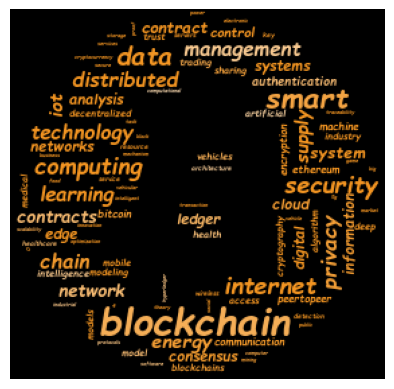

In [7]:
# 导入扩展库
import re # 正则表达式库
import collections # 词频统计库
import numpy as np # numpy数据处理库
import jieba # 结巴分词
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库

# 读取文件
fn = open('topKeywords.txt') # 打开文件
string_data = fn.read() # 读出整个文件
fn.close() # 关闭文件

# 文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式
string_data = re.sub(pattern, '', string_data) # 将符合模式的字符去除

# 文本分词
seg_list_exact = jieba.cut(string_data, cut_all = False) # 精确模式分词
object_list = []
remove_words = [u'|', u'of', u' ', u'and', u'things'] # 自定义去除词库

for word in seg_list_exact: # 循环读出每个分词
    if word not in remove_words: # 如果不在去除词库中
        object_list.append(word) # 分词追加到列表

# 词频统计
word_counts = collections.Counter(object_list) # 对分词做词频统计
word_counts_top10 = word_counts.most_common(20) # 获取前10最高频的词
print (word_counts_top10) # 输出检查

# 词频展示
mask = np.array(Image.open('bit.png')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/comicz.ttf', # 设置字体格式
    mask=mask, # 设置背景图
    max_words=200, # 最多显示词数
    max_font_size=100 # 字体最大值
)

wc.generate_from_frequencies(word_counts) # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.savefig('wordcloud.png')
plt.show() # 显示图像